In [1]:
import torch
from dpm.models import BernoulliNaiveBayes
from dpm.visualize import plot_stats
import numpy as np

In [2]:
y = torch.cat((torch.zeros(1000), torch.ones(2000))).view(-1, 1).float()
y.shape

torch.Size([3000, 1])

In [3]:
np.random.binomial(size=(3, 3), n=1, p=0.6)

array([[1, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [4]:
x = torch.cat((torch.tensor(np.random.binomial(size=(1000, 10), n=1, p=0.7)), 
               torch.tensor(np.random.binomial(size=(2000, 10), n=1, p=0.2))), dim=0).float()
x.shape

torch.Size([3000, 10])

In [5]:
model = BernoulliNaiveBayes()

In [6]:
model.log_prob(x, y)

tensor([-14.9903, -14.3686, -10.0948,  ..., -10.2825,  -7.4521,  -9.6874],
       grad_fn=<SumBackward2>)

In [7]:
model.y_dist.probs

Parameter containing:
tensor([0.9813], requires_grad=True)

In [8]:
stats = model.fit(x, y)

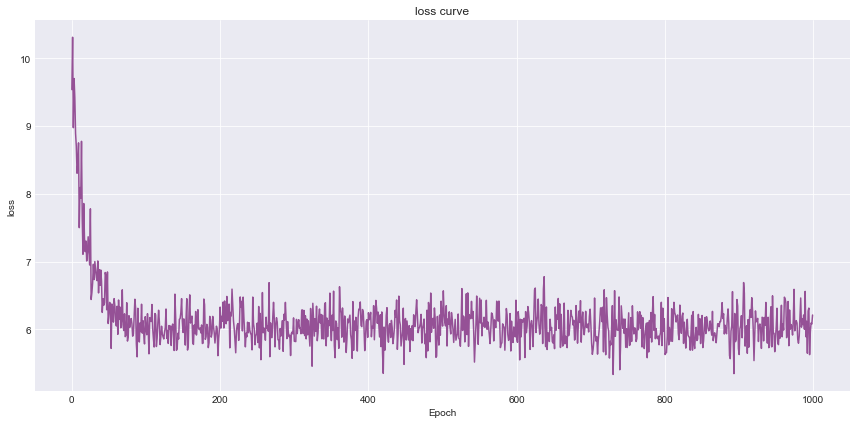

In [9]:
plot_stats(stats)

In [10]:
model.y_dist.probs

Parameter containing:
tensor([0.6522], requires_grad=True)

In [11]:
(model.predict(x) == y.long()).float().mean()

tensor(0.9600)

In [12]:
model.x_dist[0].probs

Parameter containing:
tensor([0.6652, 0.6863, 0.7446, 0.6844, 0.7165, 0.6656, 0.7042, 0.6783, 0.7468,
        0.7162], requires_grad=True)

In [13]:
model.x_dist[1].probs

Parameter containing:
tensor([0.2104, 0.2169, 0.2242, 0.2178, 0.2008, 0.2068, 0.1902, 0.2301, 0.1834,
        0.2076], requires_grad=True)

In [14]:
X = model.sample(5)
print(X)
print(X.mean(dim=1))

tensor([[0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
        [1., 1., 1., 0., 1., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 1., 0., 0., 1., 1., 1.]], grad_fn=<IndexBackward>)
tensor([0.2000, 0.0000, 0.3000, 0.5000, 0.5000], grad_fn=<MeanBackward0>)


In [15]:
model.predict(X)

tensor([[1],
        [1],
        [1],
        [0],
        [0]])